In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from tensorflow import keras
from tensorflow.keras import layers

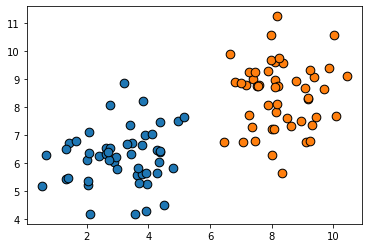

In [30]:
# Generate random data 

X, Y = make_blobs(n_features=2, centers=2)

plt.scatter(X[Y==0, 0], X[Y==0, 1], marker='o', s=75, edgecolor='k')
plt.scatter(X[Y==1, 0], X[Y==1, 1], marker='o', s=75, edgecolor='k')
plt.show()

In [35]:
# Keras Method

np.random.seed(1)
input_dim = X.shape[1]
output_dim = 1                          

model = keras.Sequential()
model.add(layers.Dense(output_dim, input_dim = input_dim, activation='sigmoid'))

sgd = keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

num_epochs = 2000
batch_size = X.shape[0]
#historia = modelo.fit(X, Y, epochs=num_epochs, batch_size=batch_size, verbose=2)
model.fit(X, Y, epochs=num_epochs, verbose=0)

lyrs = model.layers[0]
w, b = lyrs.get_weights()
print('Parameter w: ', w)
print('\n')
print('Parameter b: ', b)
print('\n')

# Index [1] to obtain accuracy
# Index [0] to obtain the loss function

exac = model.evaluate(X, Y)[1]
print('Accuracy is: ', round(exac, 2)*100, '%')

Parameter w:  [[ 2.8710523 ]
 [-0.81161594]]


Parameter b:  [-9.977193]


4/4 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 1.0000
Accuracy is:  100.0 %


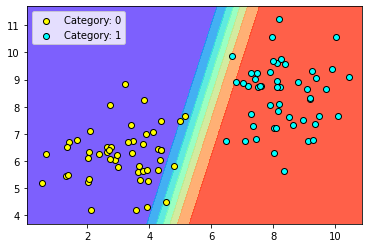

In [37]:
def draw_border(X,Y,model):
    # Minimum and maximum value and filled with zeros
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.1

    # Points grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict categories for each point on the grid
    Z = model.predict(np.c_[xx.flatten(), yy.flatten()])
    Z = Z.reshape(xx.shape)

    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap='rainbow', alpha=0.8)

    plt.scatter(X[Y==0, 0],X[Y==0, 1], color='yellow', edgecolor='k', label='Category: 0')
    plt.scatter(X[Y==1, 0],X[Y==1, 1], color='cyan', edgecolor='k', label='Category: 1')
    plt.legend()
    plt.show()

draw_border(X,Y,model)